In [314]:
import csv
import math
from statistics import median, mode, mean
from collections import Counter
from enum import Enum
import numpy as np
import pandas as pd


Retrieving dataset

In [315]:
df = pd.read_csv("data/housing_price_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Extracting independent data

In [316]:
X = df.iloc[:,:-1].values
X

array([[1, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       [2, 20, 'RL', ..., 2007, 'WD', 'Normal'],
       [3, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       ...,
       [1458, 70, 'RL', ..., 2010, 'WD', 'Normal'],
       [1459, 20, 'RL', ..., 2010, 'WD', 'Normal'],
       [1460, 20, 'RL', ..., 2008, 'WD', 'Normal']], dtype=object)

Extracting dependent data

In [317]:
Y = df.iloc[:,-1].values
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

Checking for nullvalues in dataframe

In [318]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Checking what is best between mean and median for LotFrontage

C:\Users\minh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


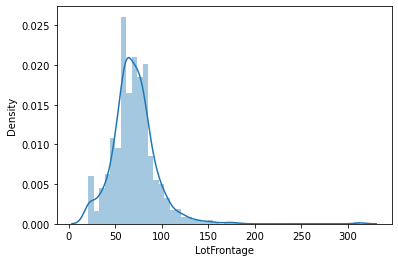

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df.LotFrontage)
plt.show()

Filling in nullvalues in LotFrontage with median

In [320]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

In [321]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [322]:
def PriceRangeCalc(df):
    salePriceCount = pd.DataFrame()
    SalePrice = df["SalePrice"]
    a, b, c, d, e, f, g, h = 0,0,0,0,0,0,0,0

    for price in SalePrice:
        if price <= 100000:
            a += 1
        if price > 100000 and price <=200000:
            b += 1
        if price > 200000 and price <=300000:
            c += 1
        if price > 300000 and price <=400000:
            d += 1
        if price > 400000 and price <=500000:
            e += 1
        if price > 500000 and price <=600000:
            f += 1
        if price > 600000 and price <=700000:
            g += 1
        if price > 700000:
            h += 1

    salePriceCount["Range"] = ["-100000", "100001-200000", "200001-300000", "300001-400000", "400001-500000", "500001-600000",
                           "600001-70000", "700001+"]
    salePriceCount["Count"] = [a, b, c, d, e, f, g, h]


    return salePriceCount

In [323]:
PriceRangeCalc(df)

,Range,Count
0,-100000,123
1,100001-200000,910
2,200001-300000,312
3,300001-400000,87
4,400001-500000,19
5,500001-600000,5
6,600001-70000,2
7,700001+,2


Converting Categorical data into numberic form

In [324]:
# Could make a new df with only colums with numerical values and categories
numerical_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtype == "int64":
        numerical_df[col] = df[col]
        continue
    else:
        df[col] = df[col].astype("category")
        new_col = '{val}_Cat'.format(val=col)
        numerical_df[new_col] = df[col].cat.codes
        
        # df[col] = df[col].astype("category")
        # new_col = '{val}_Cat'.format(val=col)
        # df[new_col] = df[col].cat.codes
numerical_df

,Id,MSSubClass,MSZoning_Cat,LotFrontage_Cat,LotArea,Street_Cat,Alley_Cat,LotShape_Cat,LandContour_Cat,Utilities_Cat,...,PoolArea,PoolQC_Cat,Fence_Cat,MiscFeature_Cat,MiscVal,MoSold,YrSold,SaleType_Cat,SaleCondition_Cat,SalePrice
0,1,60,3,36,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,51,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,39,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,31,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,55,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,33,7917,1,-1,3,3,0,...,0,-1,-1,-1,0,8,2007,8,4,175000
1456,1457,20,3,56,13175,1,-1,3,3,0,...,0,-1,2,-1,0,2,2010,8,4,210000
1457,1458,70,3,37,9042,1,-1,3,3,0,...,0,-1,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,39,9717,1,-1,3,3,0,...,0,-1,-1,-1,0,4,2010,8,4,142125
